In [1]:
#import all the dependancies to create the model
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in the training set data
training_set = pd.read_csv('training_set.csv')
#map the result to be 1 for home win, 0 for home loss
training_set['HomeResult'] = training_set['HomeResult'].map({'Won': 1, 'Lost': 0})
#result has the result of the game (Y input fo the model)
result = training_set["HomeResult"]
#data dataframe has all of the inputs for the model
data = training_set.iloc[:, 7:]
#info dataframe has all the info for the games
info = training_set.iloc[:, :7]
info.head()


,Game,Date,AwayTeam,AwayScore,HomeTeam,HomeScore,HomeResult
0,"2021-02-02 - MIN 1, COL 2",2021-02-02,MIN,1,COL,2,1
1,"2021-02-04 - OTT 3, MTL 2",2021-02-04,OTT,3,MTL,2,0
2,"2021-02-04 - VAN 3, TOR 7",2021-02-04,VAN,3,TOR,7,1
3,"2021-02-05 - BOS 2, PHI 1",2021-02-05,BOS,2,PHI,1,0
4,"2021-02-06 - MTL 2, OTT 1",2021-02-06,MTL,2,OTT,1,0


In [3]:
# Load input data and results
training_set = pd.read_csv('training_set.csv')
X = data
y = result

#Split the dataset into train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create the scaler and scale the data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

#use the .predict function to predict the result and the .predict_proba to get the probabilsitic outcomes
predicted_labels = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)

#Create a dataframe with the results
results_df = pd.DataFrame(probabilities, columns=[f'Prob_{label}' for label in svm_model.classes_])
results_df['Predicted Label'] = predicted_labels

print(results_df.head())

     Prob_0    Prob_1  Predicted Label
0  0.471785  0.528215                1
1  0.370947  0.629053                1
2  0.570334  0.429666                0
3  0.661864  0.338136                0
4  0.500000  0.500000                0


In [9]:
import joblib

#save the model and scalers as .joblib files for later use
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [6]:
#Calculate Log Loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.666293793312864


Log Loss: 0.666293793312864


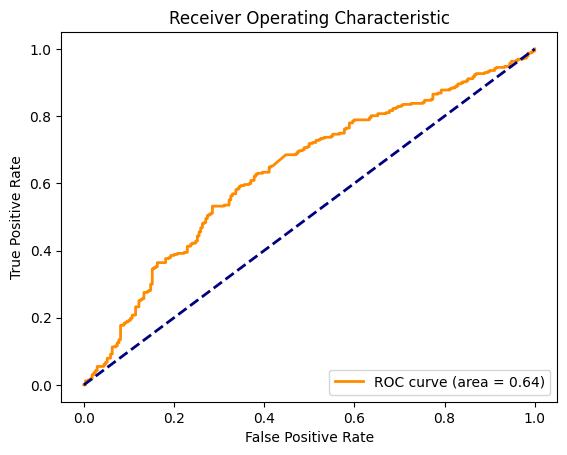

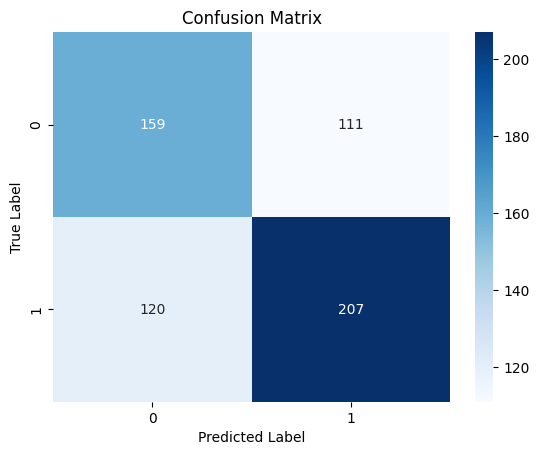

In [8]:
#Metrics
#Log loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

#ROC and AUC Curves
y_probs = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()